In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pointscat.forward_problem import angle_to_vec, PointScatteringProblem, compute_far_field, green_function
from pointscat.inverse_problem import unif_sample_disk, DiscreteMeasure, solve_blasso


plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['+Computer Modern'],
    'font.size': 20,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

np.random.seed(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


# Collapsing spikes

In [2]:
wave_number = 1
num_frequencies = 30
cutoff_frequency = 2 * wave_number
frequencies = unif_sample_disk(num_frequencies, cutoff_frequency)

incident_angles = np.array([np.pi + np.angle(k[0]+1j*k[1]) - np.arccos(np.linalg.norm(k)/(2*wave_number))
                            for k in frequencies])
observation_directions = np.array([np.angle(k[0]+1j*k[1]) + np.arccos(np.linalg.norm(k)/(2*wave_number))
                                   for k in frequencies])

In [3]:
amplitudes = np.array([1, 1])
locations = np.array([[-1/2, 0], [1/2, 0]])

In [4]:
condition_number_tab = []
β_tab = []
norm_foldy_sol_tab = []
norm_far_field_tab = []

δ_tab = np.logspace(-10, 1, 500)[::-1]

In [5]:
for δ in δ_tab:
    point_scat = PointScatteringProblem(δ * locations, amplitudes, wave_number)
    foldy_matrix = point_scat.compute_foldy_matrix()
    foldy_solutions = point_scat.solve_foldy_systems(incident_angles)
    far_field = point_scat.compute_far_field(incident_angles, observation_directions)
    
    green = green_function(wave_number, δ * locations[0], δ * locations[1])
    β_tab.append(np.abs(wave_number**4 * amplitudes[0] * amplitudes[1] * green))
    condition_number_tab.append(np.linalg.cond(foldy_matrix))
    norm_foldy_sol_tab.append(np.linalg.norm(foldy_solutions))
    norm_far_field_tab.append(np.linalg.norm(far_field))

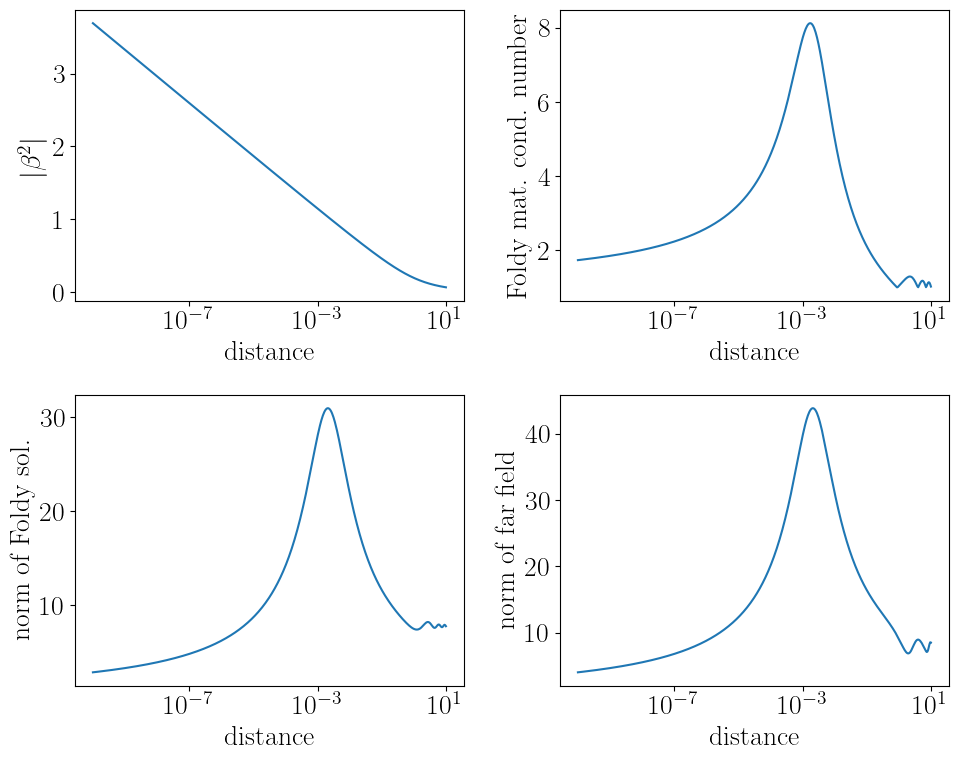

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(δ_tab, β_tab)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('distance')
axs[0, 0].set_ylabel(r'$|\beta^2|$')

axs[0, 1].plot(δ_tab, condition_number_tab)
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('distance')
axs[0, 1].set_ylabel('Foldy mat. cond. number')

axs[1, 0].plot(δ_tab, norm_foldy_sol_tab)
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('distance')
axs[1, 0].set_ylabel('norm of Foldy sol.')

axs[1, 1].plot(δ_tab, norm_far_field_tab)
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('distance')
axs[1, 1].set_ylabel('norm of far field')

fig.tight_layout();

# Neighboring spikes with vanishing amplitude

In [7]:
wave_number = 1
num_frequencies = 30
cutoff_frequency = 2 * wave_number
frequencies = unif_sample_disk(num_frequencies, cutoff_frequency)

incident_angles = np.array([np.pi + np.angle(k[0]+1j*k[1]) - np.arccos(np.linalg.norm(k)/(2*wave_number))
                            for k in frequencies])
observation_directions = np.array([np.angle(k[0]+1j*k[1]) + np.arccos(np.linalg.norm(k)/(2*wave_number))
                                   for k in frequencies])

In [8]:
amplitudes = np.array([1.0, 15.0])
locations = np.array([[-0.01, 0], [0.01, 0]])

In [9]:
condition_number_tab = []
β_tab = []
norm_foldy_sol_tab = []
norm_far_field_tab = []

a_tab = np.logspace(-8, 3, 500)[::-1]

In [10]:
for a in a_tab:
    amplitudes[0] = a
    point_scat = PointScatteringProblem(locations, amplitudes, wave_number)
    foldy_matrix = point_scat.compute_foldy_matrix()
    foldy_solutions = point_scat.solve_foldy_systems(incident_angles)
    far_field = point_scat.compute_far_field(incident_angles, observation_directions)
    
    green = green_function(wave_number, locations[0], locations[1])
    β_tab.append(np.abs(wave_number**4 * amplitudes[0] * amplitudes[1] * green))
    condition_number_tab.append(np.linalg.cond(foldy_matrix))
    norm_foldy_sol_tab.append(np.linalg.norm(foldy_solutions))
    norm_far_field_tab.append(np.linalg.norm(far_field))

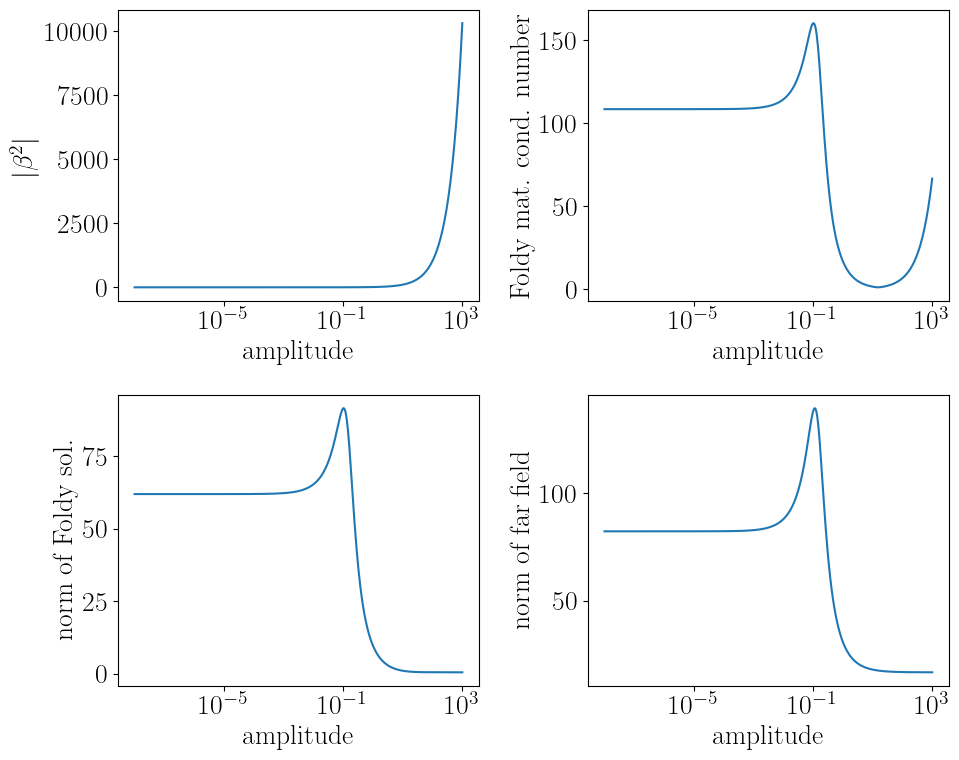

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(a_tab, β_tab)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('amplitude')
axs[0, 0].set_ylabel(r'$|\beta^2|$')

axs[0, 1].plot(a_tab, condition_number_tab)
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('amplitude')
axs[0, 1].set_ylabel('Foldy mat. cond. number')

axs[1, 0].plot(a_tab, norm_foldy_sol_tab)
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('amplitude')
axs[1, 0].set_ylabel('norm of Foldy sol.')

axs[1, 1].plot(a_tab, norm_far_field_tab)
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('amplitude')
axs[1, 1].set_ylabel('norm of far field')

fig.tight_layout();